Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



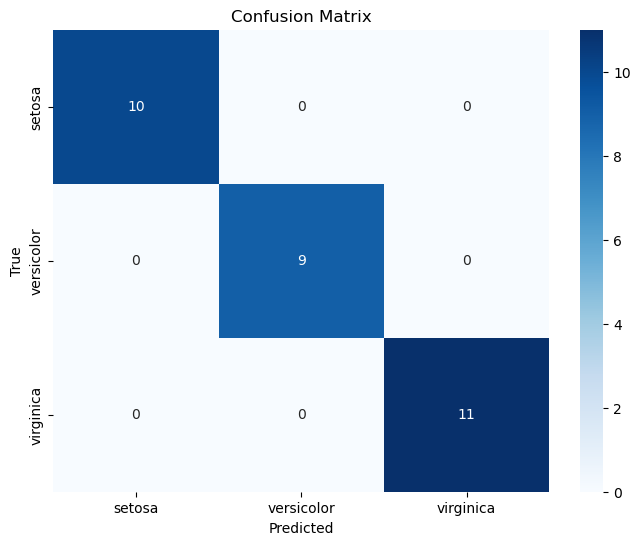

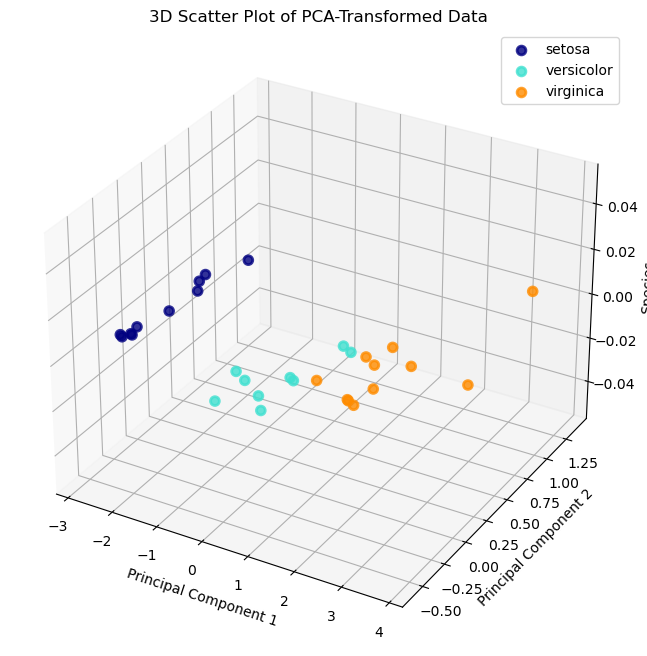

In [5]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


df = sns.load_dataset('iris')


le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])


X = df.drop('species', axis=1)
y = df['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()





pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


model.fit(X_train_pca, y_train)


X_test_pca = pca.transform(X_test) 
y_pred_pca = model.predict(X_test_pca)


accuracy_pca = accuracy_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
class_report_pca = classification_report(y_test, y_pred_pca)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], le.classes_):
    ax.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], c=color, label=target_name, s=40, alpha=0.8, lw=lw)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Species')
ax.legend(loc='best')
ax.set_title('3D Scatter Plot of PCA-Transformed Data')
plt.show()



